# Exploration 1. Classification
---
# (프로젝트 1) load_digits : 손글씨를 분류해 봅시다

## I. 개요
## 1. 데이터 셋 소개
Scikit-Learn에서 제공하는 손글씨 데이터는 UCI ML hand-written digits datasets의 test set의 copy로 이루어져 있습니다.   
총 데이터의 수는 1797개이며, 64개의 Feature(8X8 pixel)를 가지고 있습니다.   
숫자는 0\~9가지 총 10개 숫자로 분류되어 있으며, 각 Feature(pixel)에는 0~16까지 정수 형태로 표시되어 있습니다.    
(※ 세부 정보 참고 https://scikit-learn.org/stable/datasets/toy_dataset.html)

## 2. 프로젝트 목적
손글씨 이미지 데이터를 바탕으로 아래 5가지 모델을 활용하여 분류를 수행하고 적합한 모델에 대해 탐색해 보도록 하겠습니다.
* Decision Tree
* Random Forest
* SVM
* SGD Classifier
* Logistic Regression

## II. 프로젝트 수행
## 1. 필요한 모듈 import

In [1]:
# data source
from sklearn.datasets import load_digits

# data manipulation
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


# training and test module
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn import svm 
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression 

# metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

## 2. 데이터 준비


In [2]:
digits = load_digits()

## 3. 데이터 이해하기 (EDA)

- Feature Data 지정하기
- Label Data 지정하기
- Target Names 출력해 보기
- 데이터 Describe 해 보기

### 3.1. 세부 데이터 타입 및 내용 확인

In [3]:
type(digits)

sklearn.utils._bunch.Bunch

In [4]:
# 전체 데이터 구성 확인
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
# 데이터 설명 정보 확인
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [6]:
# 데이터 내용 확인
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
# 데이터 세부 내용 구성 확인
digits.data[0:2]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

0\~16까지 숫자로 구성되어 있다고 하는데 실제 데이터에서도 0~16까지들의 숫자들이 보입니다.

In [8]:
# data 형태 확인
digits.data.shape

(1797, 64)

In [9]:
# target 종류 확인
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
# target name 확인
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

target_names를 통해 0\~9까지 숫자를 확인할 수 있습니다.

In [11]:
# target값 분포 확인
Counter(digits.target)

Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

데이터 분포 확인 결과 0\~9까지의 숫자가 고르게 분포되어 있습니다.  

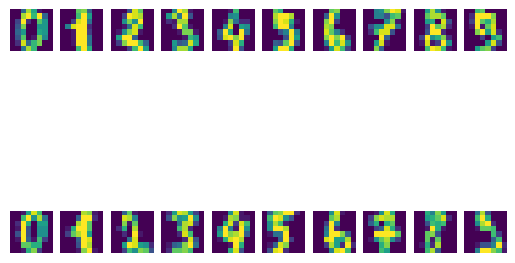

In [12]:
# 데이터 이미지 확인
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(digits.data[i].reshape(8,8))
    plt.axis('off')

이미지를 통해서도 0\~9까지의 숫자가 순서대로 적혀 있는 것을 확인할 수 있습니다.

### 3.2. DataFrame 만들기

In [13]:
digits_df = pd.DataFrame(data = digits.data, columns = digits.feature_names)

In [14]:
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [15]:
digits_df["label"] = digits.target

In [16]:
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [17]:
digits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [18]:
digits_df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


### 3.3. 결측값 및 중복 확인

In [19]:
# 결측값 확인
digits_df[digits_df.isnull().any(axis=1)]

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label


In [20]:
#중복 확인
digits_df[digits_df.duplicated()]

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label


결측도 중복도 없는 깔끔한 데이터입니다.

## 4. train, test 데이터 분리

In [21]:
# train : test = 8: 2로 분리
X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(digits.data,
                                                   digits.target,
                                                   test_size=0.2,
                                                   random_state=1)

In [22]:
print('X_train_digits 개수: ', len(X_train_digits),', X_test_digits 개수: ', len(X_test_digits))

X_train_digits 개수:  1437 , X_test_digits 개수:  360


In [23]:
X_train_digits.shape, y_train_digits.shape

((1437, 64), (1437,))

In [24]:
Counter(y_test_digits)

Counter({1: 35, 5: 30, 0: 43, 7: 37, 6: 37, 4: 38, 9: 34, 2: 36, 8: 29, 3: 41})

## 5. 다양한 모델로 학습시켜보기

- Decision Tree 사용해 보기
-  Random Forest 사용해 보기
-  SVM 사용해 보기
-  SGD Classifier 사용해 보기
-  Logistic Regression 사용해 보기

### 5.1. 각 모델로 Train 및 성능분석

In [25]:
# 각 모델 불러오기
dt = DecisionTreeClassifier(random_state=1)
rf = RandomForestClassifier(random_state=1)
sv = svm.SVC()
sg = SGDClassifier()
lr = LogisticRegression(solver='lbfgs', max_iter=5000)

In [26]:
# 각 모델을 한꺼번에 실행하기 위해 dictionary로 구성
models = {'DecisionTree' :{'model': dt},'RandomForestClassifier': {'model' : rf}, 'SupportVector' : {'model' :  sv}, 'SGDClassifier' : {'model' : sg}, 'LogisticRegression' : {'model' : lr}}

In [27]:
# 각 모델을 for 문으로 일괄 실행 
for k,v in models.items() :
    v['model'].fit(X_train_digits, y_train_digits)
    p = v['model'].predict(X_test_digits)
    v['acc'] = accuracy_score(y_test_digits, p)
    v['conf'] = confusion_matrix(y_test_digits, p)
    v['f1'] = f1_score(y_test_digits, p, average='weighted')
    # v['f1'] = f1_score(y_test_digits, p)
    v['pre'] = precision_score(y_test_digits, p, average='weighted')
    # v['pre'] = precision_score(y_test_digits, p)
    v['rec'] = recall_score(y_test_digits, p, average='weighted')    
    # v['rec'] = recall_score(y_test_digits, p)
    v['report'] = classification_report(y_test_digits, p)

In [28]:
# models 결과값 확인
models

{'DecisionTree': {'model': DecisionTreeClassifier(random_state=1),
  'acc': 0.8388888888888889,
  'conf': array([[40,  0,  0,  0,  1,  1,  0,  0,  1,  0],
         [ 0, 29,  1,  1,  1,  0,  1,  0,  1,  1],
         [ 0,  0, 30,  2,  0,  2,  1,  0,  0,  1],
         [ 0,  0,  3, 29,  0,  0,  0,  3,  2,  4],
         [ 0,  1,  0,  0, 32,  1,  3,  1,  0,  0],
         [ 0,  0,  0,  0,  0, 29,  0,  0,  0,  1],
         [ 0,  0,  1,  0,  0,  0, 36,  0,  0,  0],
         [ 0,  0,  1,  2,  4,  0,  0, 28,  1,  1],
         [ 0,  0,  0,  2,  0,  1,  0,  1, 25,  0],
         [ 0,  2,  0,  1,  1,  3,  0,  3,  0, 24]]),
  'f1': 0.837852740644273,
  'pre': 0.8402198198628585,
  'rec': 0.8388888888888889,
  'report': '              precision    recall  f1-score   support\n\n           0       1.00      0.93      0.96        43\n           1       0.91      0.83      0.87        35\n           2       0.83      0.83      0.83        36\n           3       0.78      0.71      0.74        41\n         

In [29]:
print(models['DecisionTree']['report']) # 참고를 위해 classification report 출력

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.91      0.83      0.87        35
           2       0.83      0.83      0.83        36
           3       0.78      0.71      0.74        41
           4       0.82      0.84      0.83        38
           5       0.78      0.97      0.87        30
           6       0.88      0.97      0.92        37
           7       0.78      0.76      0.77        37
           8       0.83      0.86      0.85        29
           9       0.75      0.71      0.73        34

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.84      0.84      0.84       360



In [30]:
type(models) # models 타입 확인

dict

In [31]:
# models 값의 결과를 확인하기 쉽도록 DataFrame으로 변환
digits_results = pd.DataFrame.from_dict(models, orient='index', columns=['acc', 'f1' , 'pre', 'rec' ])

In [32]:
# 성능평가를 위한 performance 값 확인
digits_results

,acc,f1,pre,rec
DecisionTree,0.838889,0.837853,0.840220,0.838889
RandomForestClassifier,0.983333,0.983378,0.983793,0.983333
SupportVector,0.991667,0.991706,0.991915,0.991667
SGDClassifier,0.975000,0.975036,0.975681,0.975000
LogisticRegression,0.972222,0.972404,0.973272,0.972222


Accuracy,F1-score, Precision, Recall 모든 성능에서 SVM이 0.99로 가장 높은 성능을 보였습니다.

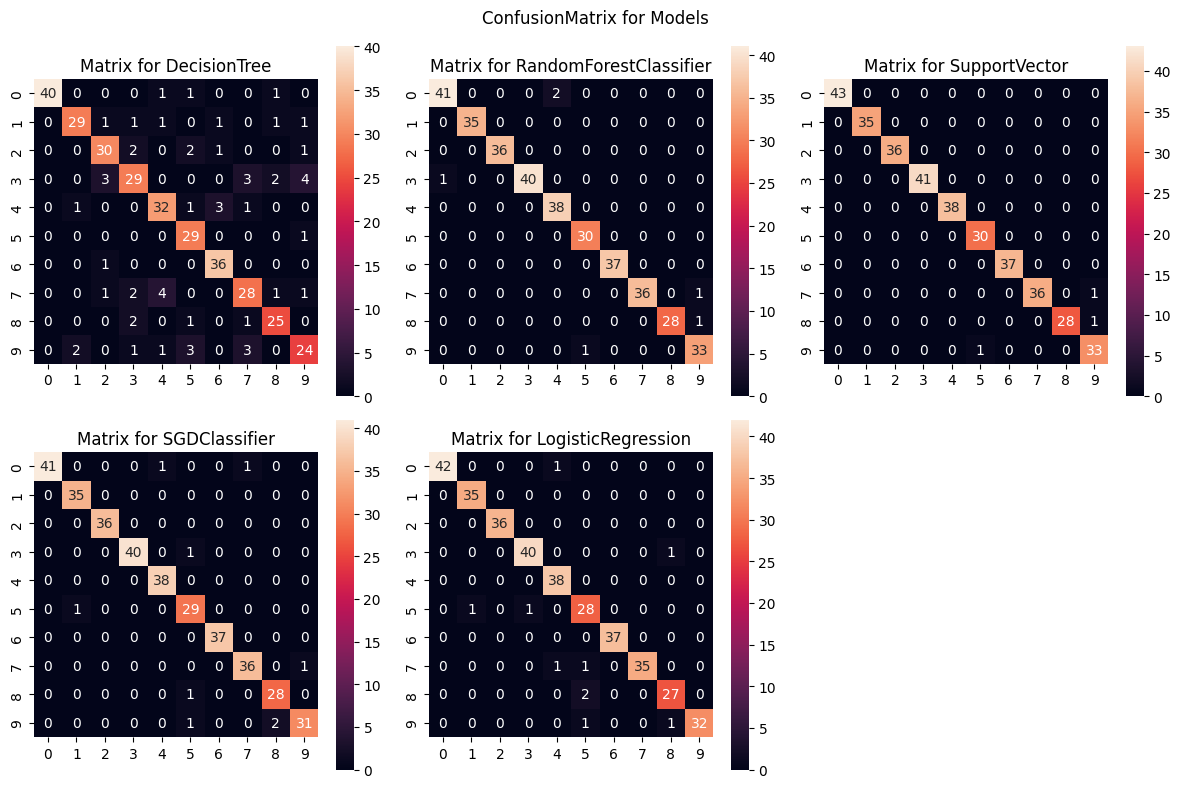

In [33]:
# 각 model별 숫자별 오류 count를 확인해 보기 위해 오차행렬 시각화
fig = plt.figure(figsize = (12,8))
for i, model in enumerate(models.keys()) :
    ax = fig.add_subplot(2,3,i+1)
    sns.heatmap(data = models[model]['conf'], annot=True, square= True)
    plt.title('Matrix for {}'.format(model))
    
plt.suptitle('ConfusionMatrix for Models')
plt.tight_layout()
plt.show()

오차행렬을 통해서도 SVM의 경우 7, 8, 9 에서 일부 오류가 보이며 전체적으로 정확한 분류를 확인할 수 있으며, Decision Tree의 경후 많은 숫자에서 오류가 발생한 것을 확인 가능합니다.

# III. 결론

Decision Tree, Random Foreset, Support Vector, SGD, Logistic Regression 5가지 모델로 손글씨에 대한 분류 작업을 수행했습니다.  
Accuracy, F1_Score, Precision, Recall, Confusion Matrix의 성능 지표를 종합적으로 판단했을 때 모든 측면에서 Support Vector 모델이 가장 우수하게 나왔습니다. 
단순히 기존 모델들을 활용하여 성능 평가를 수행하였으나, 향후에는 해당 모델에 대한 이해를 높여 본 프로젝트에서 Support Vector 모델이 높게 나온 이유에 대해 생각해보고 모델별 활용성에 대한 이해를 넓게 가져갈 수 있기를 기대합니다.

In [34]:
digits_results

,acc,f1,pre,rec
DecisionTree,0.838889,0.837853,0.840220,0.838889
RandomForestClassifier,0.983333,0.983378,0.983793,0.983333
SupportVector,0.991667,0.991706,0.991915,0.991667
SGDClassifier,0.975000,0.975036,0.975681,0.975000
LogisticRegression,0.972222,0.972404,0.973272,0.972222


## * 회고

* lr 모델로 training 시 메모리 limit으로 아래와 같은 warning 발생함. 아래 해결 참조 소스를 활용하여 iteration 횟수를 증가시키면 에러를 상세할 수 있음 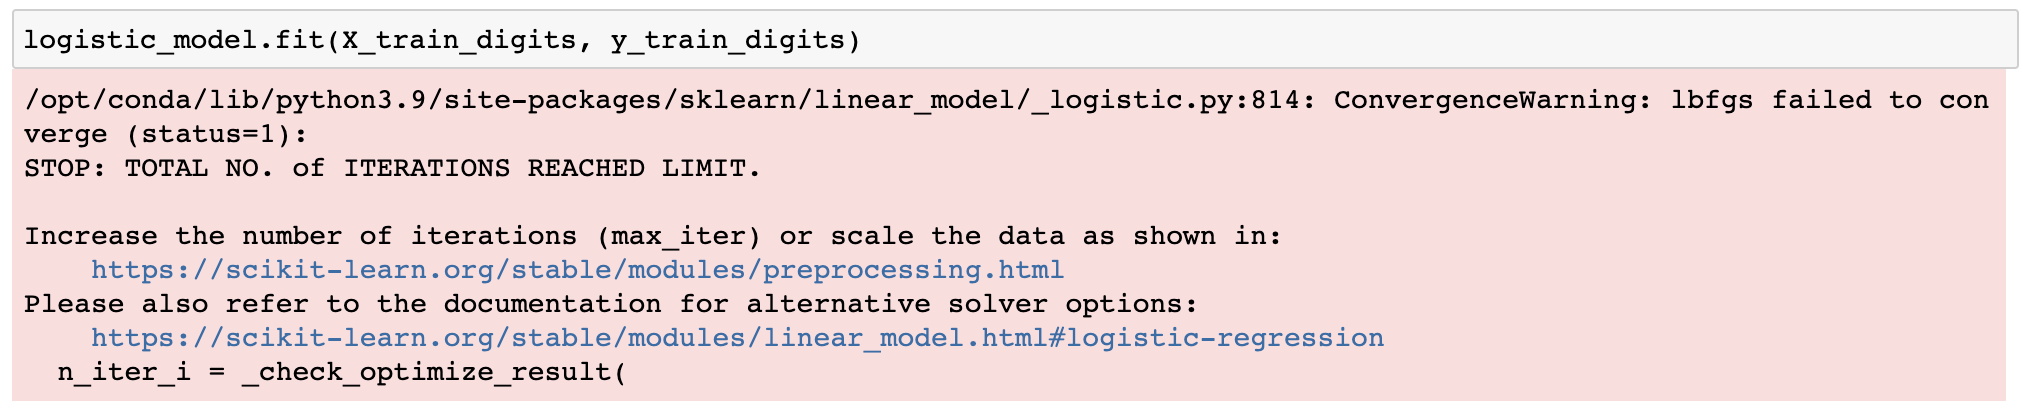
[해결 참고 소스] https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter  




## * 참고자료
https://github.com/seuyon0101/aiffel/blob/master/%5BE-01%5Dclassification.ipynb

---

# (프로젝트 2) load_wine : 와인을 분류해 봅시다

## I. 개요
## 1. 데이터 셋 소개
Scikit-Learn에서 제공하는 와인 데이터는 UCI ML wine datasets의 test set의 copy로 이루어져 있습니다.   
총 데이터의 수는 178개이며, 13개의 Feature를 가지고 있습니다.   
와인은 특성에 따라 3가지 종류로 분류되어 있습니다.   
(※ 세부 정보 참고 https://scikit-learn.org/stable/datasets/toy_dataset.html)

## 2. 프로젝트 목적
5가지 모델을 활용하여 와인의 성분 및 특성에 따라 분류를 수행하고 적합한 모델에 대해 탐색해 보도록 하겠습니다.
* Decision Tree
* Random Forest
* SVM
* SGD Classifier
* Logistic Regression

## II. 프로젝트 수행
## 1. 필요한 모듈 import

In [35]:
# data source
from sklearn.datasets import load_wine

# data manipulation
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


# training and test module
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn import svm 
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression 

# metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

## 2. 데이터 준비

In [36]:
wine = load_wine()

## 3. 데이터 이해하기 (EDA)

- Feature Data 지정하기
- Label Data 지정하기
- Target Names 출력해 보기
- 데이터 Describe 해 보기

### 3.1. 세부 데이터 타입 및 내용 확인

In [37]:
type(wine)

sklearn.utils._bunch.Bunch

In [38]:
# 전체 데이터 구성 확인
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [39]:
# 데이터 설명 정보 확인
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [40]:
# 데이터 내용 확인
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [41]:
# data 형태 확인
wine.data.shape

(178, 13)

In [42]:
# target 종류 확인
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [43]:
# target name 확인
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [44]:
# target값 분포 확인
Counter(wine.target)

Counter({0: 59, 1: 71, 2: 48})

데이터 분포 확인 결과 0\~2까지(3종류)의 숫자가 고르게 분포되어 있습니다.  

### 3.2. DataFrame 만들기

In [45]:
wine_df = pd.DataFrame(data = wine.data, columns = wine.feature_names)

In [46]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

모든 특성값이 non-null type으로 결측값이 없으며, 실수 형태(float)의 값을 가지는 것을 확인할 수 있습니다. 

In [47]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [48]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


표준편차(std)를 참고해 볼 때, 상대적으로 magnesium과 proline의 편차가 큰 것을 확인할 수 있습니다.

In [49]:
# 각 특성별 상관관계 비교
wine_df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


<AxesSubplot: >

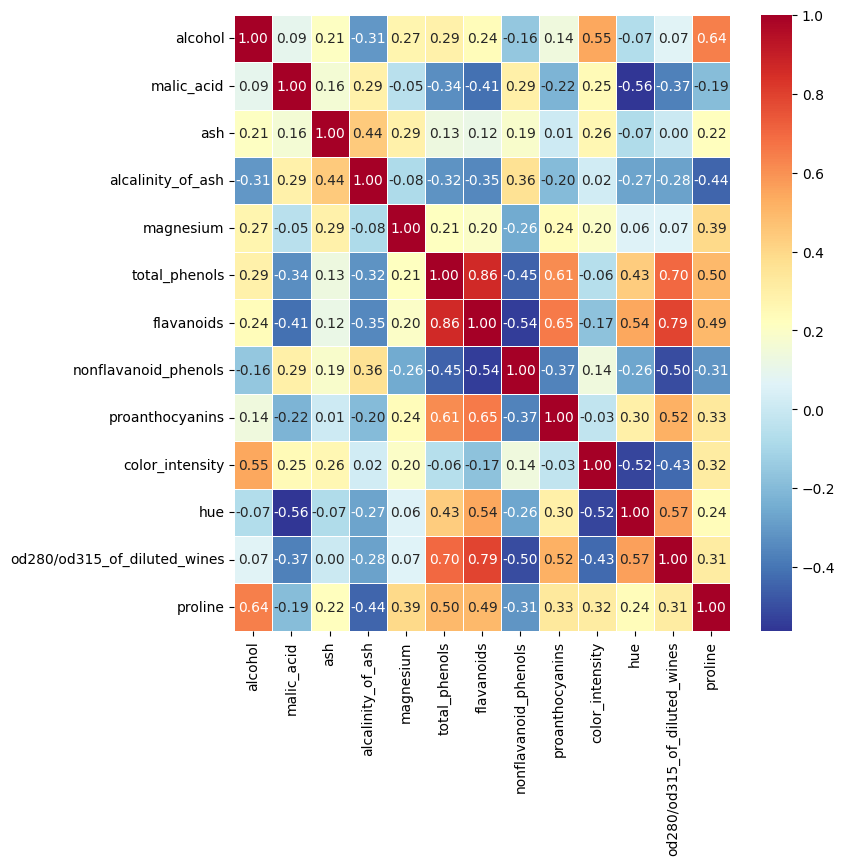

In [50]:
plt.figure(figsize=(8,8))
sns.heatmap(data = wine_df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='RdYlBu_r')

상관관계가 큰 항목들만 따로 모아서 보고 싶으나 추후 방법을 찾게 되면 업데이트 하도록 하겠습니다. 

### 3.3. 결측값 및 중복 확인

결측값은 info를 통해 없는 것이 확인되었기 때문에 중복값만 확인하도록 하겠습니다.

In [51]:
#중복 확인
wine_df[wine_df.duplicated()]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline


역시 중복값도 없습니다.

## 4. train, test 데이터 분리

In [52]:
# train : test = 8: 2로 분리
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(wine.data,
                                                   wine.target,
                                                   test_size=0.2,
                                                   random_state=2)

In [53]:
print('X_train_wine 개수: ', len(X_train_wine),', X_test_wine 개수: ', len(X_test_wine))

X_train_wine 개수:  142 , X_test_wine 개수:  36


In [54]:
X_train_wine.shape, y_train_wine.shape

((142, 13), (142,))

In [55]:
Counter(y_test_wine)

Counter({0: 18, 2: 9, 1: 9})

샘플 수가 적은데다 샘플이 한쪽에 약간 치우쳐서 나왔습니다. 데이터 분리 비율을 7:3 으로 바꿔 볼까요?

In [56]:
# train : test = 7: 3로 분리
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(wine.data,
                                                   wine.target,
                                                   test_size=0.3,
                                                   random_state=2)

In [57]:
print('X_train_wine 개수: ', len(X_train_wine),', X_test_wine 개수: ', len(X_test_wine))

X_train_wine 개수:  124 , X_test_wine 개수:  54


In [58]:
X_train_wine.shape, y_train_wine.shape

((124, 13), (124,))

In [59]:
Counter(y_test_wine)

Counter({0: 20, 2: 14, 1: 20})

8:2 일때 보다는 좀 더 나아진 것 같습니다.

## 5. 다양한 모델로 학습시켜보기

- Decision Tree 사용해 보기
-  Random Forest 사용해 보기
-  SVM 사용해 보기
-  SGD Classifier 사용해 보기
-  Logistic Regression 사용해 보기

### 5.1. 각 모델로 Train 및 성능분석

In [60]:
# 각 모델 불러오기
dt = DecisionTreeClassifier(random_state=2)
rf = RandomForestClassifier(random_state=2)
sv = svm.SVC()
sg = SGDClassifier()
lr = LogisticRegression(solver='lbfgs', max_iter=5000)

In [61]:
# 각 모델을 한꺼번에 실행하기 위해 dictionary로 구성
models = {'DecisionTree' :{'model': dt},'RandomForestClassifier': {'model' : rf}, 'SupportVector' : {'model' :  sv}, 'SGDClassifier' : {'model' : sg}, 'LogisticRegression' : {'model' : lr}}

In [62]:
# 각 모델을 for 문으로 일괄 실행 
for k,v in models.items() :
    v['model'].fit(X_train_wine, y_train_wine)
    p = v['model'].predict(X_test_wine)
    v['acc'] = accuracy_score(y_test_wine, p)
    v['conf'] = confusion_matrix(y_test_wine, p)
    v['f1'] = f1_score(y_test_wine, p, average='weighted')
    v['pre'] = precision_score(y_test_wine, p, average='weighted')
    v['rec'] = recall_score(y_test_wine, p, average='weighted')    
    v['report'] = classification_report(y_test_wine, p)

/Users/joowanha/opt/anaconda3/envs/jupyter/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joowanha/opt/anaconda3/envs/jupyter/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joowanha/opt/anaconda3/envs/jupyter/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

In [63]:
# models 결과값 확인
models

{'DecisionTree': {'model': DecisionTreeClassifier(random_state=2),
  'acc': 0.9074074074074074,
  'conf': array([[18,  2,  0],
         [ 0, 20,  0],
         [ 1,  2, 11]]),
  'f1': 0.9067288267288267,
  'pre': 0.9187784275503574,
  'rec': 0.9074074074074074,
  'report': '              precision    recall  f1-score   support\n\n           0       0.95      0.90      0.92        20\n           1       0.83      1.00      0.91        20\n           2       1.00      0.79      0.88        14\n\n    accuracy                           0.91        54\n   macro avg       0.93      0.90      0.90        54\nweighted avg       0.92      0.91      0.91        54\n'},
 'RandomForestClassifier': {'model': RandomForestClassifier(random_state=2),
  'acc': 1.0,
  'conf': array([[20,  0,  0],
         [ 0, 20,  0],
         [ 0,  0, 14]]),
  'f1': 1.0,
  'pre': 1.0,
  'rec': 1.0,
  'report': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        2

In [64]:
print(models['DecisionTree']['report']) # 참고를 위해 classification report 출력

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.83      1.00      0.91        20
           2       1.00      0.79      0.88        14

    accuracy                           0.91        54
   macro avg       0.93      0.90      0.90        54
weighted avg       0.92      0.91      0.91        54



In [65]:
# models 값의 결과를 확인하기 쉽도록 DataFrame으로 변환
wine_results = pd.DataFrame.from_dict(models, orient='index', columns=['acc', 'f1' , 'pre', 'rec' ])

In [66]:
# 성능평가를 위한 performance 값 확인
wine_results

,acc,f1,pre,rec
DecisionTree,0.907407,0.906729,0.918778,0.907407
RandomForestClassifier,1.000000,1.000000,1.000000,1.000000
SupportVector,0.685185,0.609296,0.560335,0.685185
SGDClassifier,0.648148,0.552872,0.482295,0.648148
LogisticRegression,0.962963,0.963264,0.966330,0.962963


RandomForest의 경우 정확도 100%가 나왔습니다. 차수별 세부 report를 확인해 보는 것이 좋겠습니다.

In [67]:
print(models['RandomForestClassifier']['report'])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



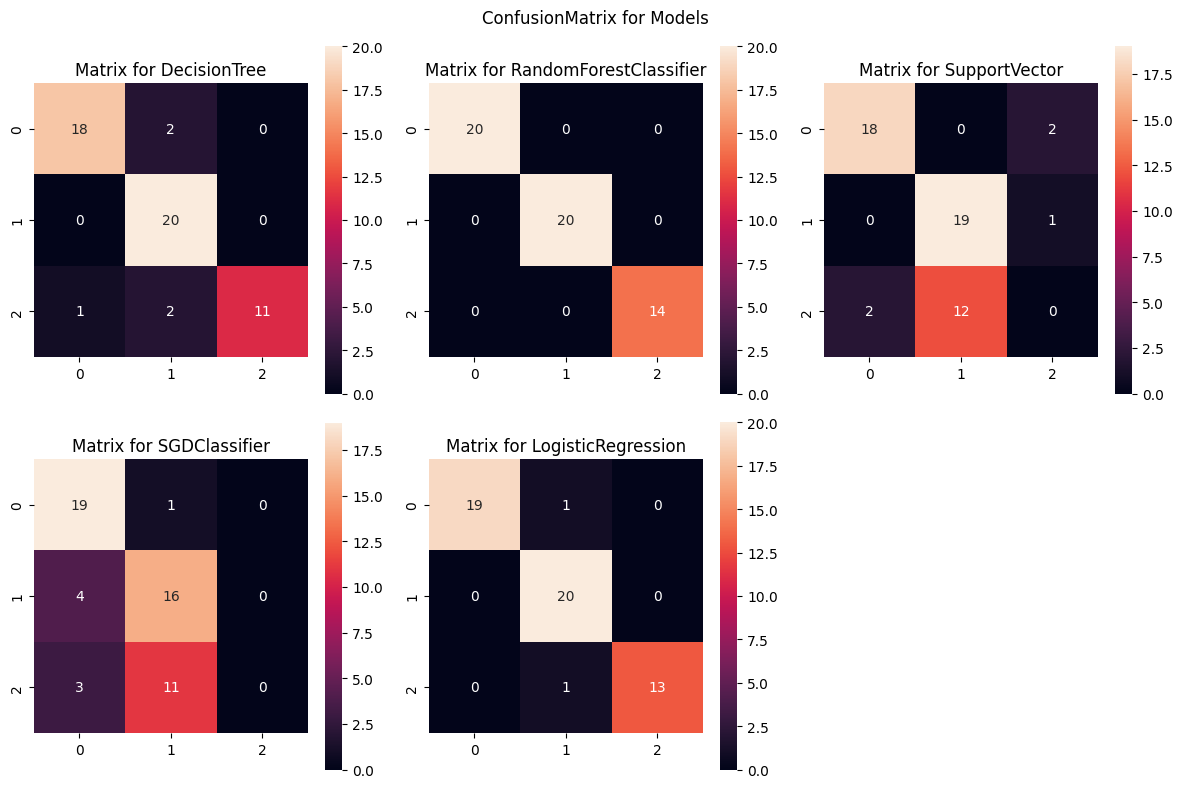

In [68]:
# 각 model별 숫자별 오류 count를 확인해 보기 위해 오차행렬 시각화
fig = plt.figure(figsize = (12,8))
for i, model in enumerate(models.keys()) :
    ax = fig.add_subplot(2,3,i+1)
    sns.heatmap(data = models[model]['conf'], annot=True, square= True)
    plt.title('Matrix for {}'.format(model))
    
plt.suptitle('ConfusionMatrix for Models')
plt.tight_layout()
plt.show()

오차행렬까지 확인해봐도 RandomForest로 분류한 결과가 100% 성능이 나왔습니다. RandomForest로 분류한 성능 결과가 높게 나온 이유를 파악할 수 있으면 좋겠으나 해당 내용도 좀 더 실력을 쌓고 파악을 해보도록 하겠습니다.

# III. 결론

Decision Tree, Random Foreset, Support Vector, SGD, Logistic Regression 5가지 모델로 와인에 대한 분류 작업을 수행했습니다.  
Accuracy, F1_Score, Precision, Recall, Confusion Matrix의 성능 지표를 종합적으로 판단했을 때 모든 측면에서 Random Forest는 월등히 높게 나왔으나, 손글씨에서 분류 정확도가 높았던 Support Vector 모델은 오히려 매우 낮은 성능을 보였습니다.  
wine에 대한 샘플수가 적은 편인데 오히려 샘플이 더욱 많았을 때 결과가 어떻게 나올지 궁금합니다.  
또한 분류 대상과 분류 Feature의 특성상 모델 성능이 매우 크게 달라지는 점을 고려할 때 목적에 맞는 모델을 선정하는 것이 매우 중요하다는 것을 알 수 있었습니다.

## * 회고

train-test set 분류 작업시 Scikit-Learn이 자동으로 균등 분류를 해 줄 거라고 기대했는데, 샘플 수가 적어서 인지 일부 편중되는 현상이 발생했으며 이를 분류 비율을 조정하여 개선했습니다.   
기존 학습 경험을 바탕으로 train-test set 비율을 8:2 기준으로 가져가고 있는데 샘플 수에 따른 적정 비율을 찾아볼 수 있으면 좋겠다는 생각을 가지게 되었습니다.
현재의 지식 수준상 accuracy, f1-score, precision, recall 등의 성능지표를 바탕으로 최적 모델을 찾고 있는데 현 수준에서는 overfitting 된 결과인지 검증이 어렵습니다. overfitting에 대한 추가 검증 방법도 학습하여 반영할 수 있으면 좋겠습니다.

---

# (프로젝트 3) load_breast_cancer : 유방암 여부를 진단해 봅시다

## I. 개요
## 1. 데이터 셋 소개
Scikit-Learn에서 제공하는 유방암 데이터는 UCI ML Breast Cancer Wisconsin (Diagnostic) dataset의 copy로 이루어져 있습니다.   
총 데이터의 수는 569개이며, 30개의 Feature를 가지고 있습니다.   
분류는 악성(Malignant)과 양성(Benign) 두 가지로 분류되며 각 Feature 실수 형태의 값을 가지고 있습니다.
(※ 세부 정보 참고 https://scikit-learn.org/stable/datasets/toy_dataset.html)

## 2. 프로젝트 목적
유방암 진단 데이터를 바탕으로 아래 5가지 모델을 활용하여 분류를 수행하고 적합한 모델에 대해 탐색해 보도록 하겠습니다.
* Decision Tree
* Random Forest
* SVM
* SGD Classifier
* Logistic Regression

## II. 프로젝트 수행
## 1. 필요한 모듈 import

In [69]:
# data source
from sklearn.datasets import load_breast_cancer

# data manipulation
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


# training and test module
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn import svm 
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression 

# metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

## 2. 데이터 준비

In [70]:
cancer = load_breast_cancer()

## 3. 데이터 이해하기 (EDA)

- Feature Data 지정하기
- Label Data 지정하기
- Target Names 출력해 보기
- 데이터 Describe 해 보기

### 3.1. 세부 데이터 타입 및 내용 확인

In [71]:
# 전체 데이터 구성 확인
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [72]:
# 데이터 설명 정보 확인
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [73]:
# 데이터 내용 확인
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [74]:
# data 형태 확인
cancer.data.shape

(569, 30)

In [75]:
# target 종류 확인
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

앞선 프로젝트와는 다르게 타겟 값이 혼재되어 있는 것을 알 수 있습니다. 

In [76]:
# target name 확인
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

악성(maligant)과 양성(benign) 두가지로 분류되어 있습니다.

In [77]:
# target값 분포 확인
Counter(cancer.target)

Counter({0: 212, 1: 357})

양성이 약간 더 많은 것을 확인할 수 있습니다.

### 3.2. DataFrame 만들기

In [78]:
cancer_df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)

In [79]:
cancer_df["label"] = cancer.target

In [80]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


feature_name으로 보건데, 진단 대상물의 사이즈, 형상, 표면정보에 대한 수치값이 주요 정보로 보입니다. 

In [81]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

모든 feature가 non-null 타입으로 결측값은 없습니다.

In [82]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


주로 편차가 크게 나타나는 부분은 mean area와 mean perimeter, worst area, mean perimeter로 보입니다. 물론 편차가 크다고 해서 주요 영향을 미치는 인자로보기는 어렵습니다.  
추후 최종 분류에 영향을 미치는 주요 인자에 대해 파악을 해 볼 수 있으면 좋겠습니다.

In [83]:
# 각 특성별 상관관계 비교
cancer_df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


<AxesSubplot: >

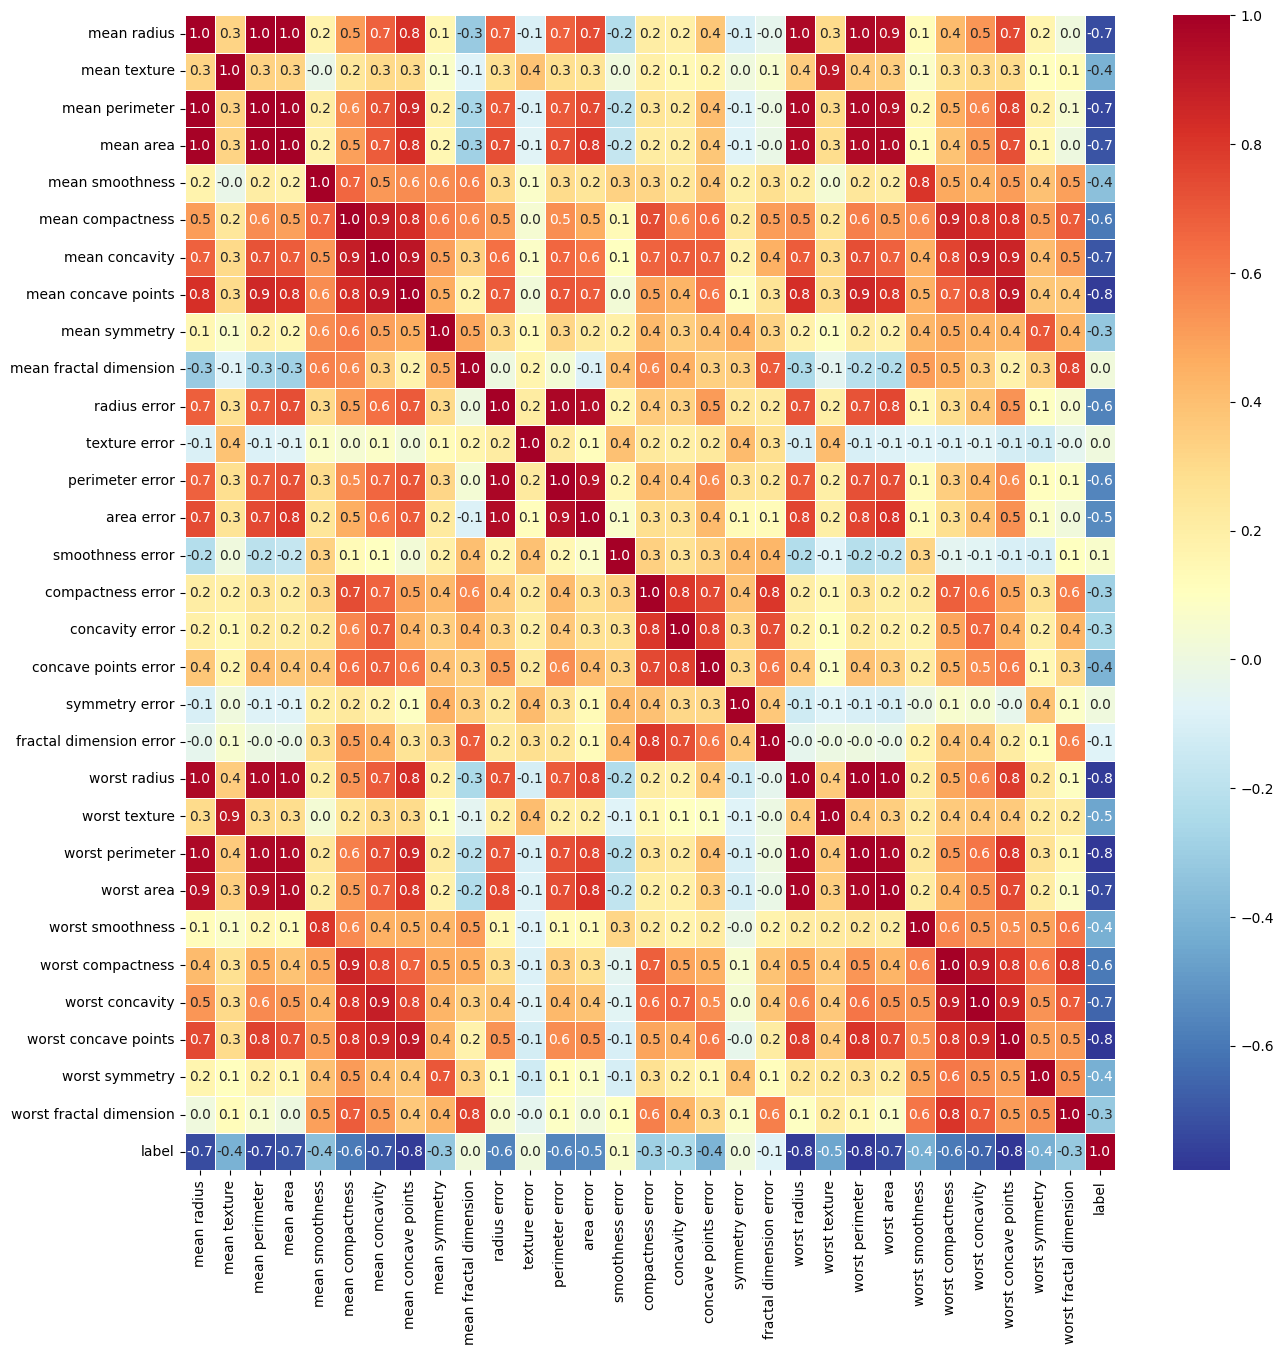

In [84]:
plt.figure(figsize=(15,15))
sns.heatmap(data = cancer_df.corr(), annot=True, fmt = '.1f', linewidths=0.5, cmap='RdYlBu_r')

### 3.3. 결측값 및 중복 확인

결측값은 info를 통해 없는 것이 확인되었기 때문에 중복값만 확인하도록 하겠습니다.

In [85]:
#중복 확인
cancer_df[cancer_df.duplicated()]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label


중복값도 없음이 확인되었습니다.

## 4. train, test 데이터 분리

In [86]:
# train : test = 8: 2로 분리
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(cancer.data,
                                                   cancer.target,
                                                   test_size=0.2,
                                                   random_state=3)

In [87]:
print('X_train_cancer 개수: ', len(X_train_cancer),', X_test_cancer 개수: ', len(X_test_cancer))

X_train_cancer 개수:  455 , X_test_cancer 개수:  114


In [88]:
X_train_cancer.shape, y_train_cancer.shape

((455, 30), (455,))

In [89]:
Counter(y_test_cancer)

Counter({1: 74, 0: 40})

전체 데이터에서도 양성이 좀 더 비율이 많이 나왔기에 유사 비율로 나온 것 같습니다. (7:4) 

## 5. 다양한 모델로 학습시켜보기

- Decision Tree 사용해 보기
-  Random Forest 사용해 보기
-  SVM 사용해 보기
-  SGD Classifier 사용해 보기
-  Logistic Regression 사용해 보기

### 5.1. 각 모델로 Train 및 성능분석

In [90]:
# 각 모델 불러오기
dt = DecisionTreeClassifier(random_state=3)
rf = RandomForestClassifier(random_state=3)
sv = svm.SVC()
sg = SGDClassifier()
lr = LogisticRegression(solver='lbfgs', max_iter=5000)

In [91]:
# 각 모델을 한꺼번에 실행하기 위해 dictionary로 구성
models = {'DecisionTree' :{'model': dt},'RandomForestClassifier': {'model' : rf}, 'SupportVector' : {'model' :  sv}, 'SGDClassifier' : {'model' : sg}, 'LogisticRegression' : {'model' : lr}}

In [92]:
# 각 모델을 for 문으로 일괄 실행 
for k,v in models.items() :
    v['model'].fit(X_train_cancer, y_train_cancer)
    p = v['model'].predict(X_test_cancer)
    v['acc'] = accuracy_score(y_test_cancer, p)
    v['conf'] = confusion_matrix(y_test_cancer, p)
    v['f1'] = f1_score(y_test_cancer, p, average='weighted')
    v['pre'] = precision_score(y_test_cancer, p, average='weighted')
    v['rec'] = recall_score(y_test_cancer, p, average='weighted')    
    v['report'] = classification_report(y_test_cancer, p)

In [93]:
# models 결과값 확인
models

{'DecisionTree': {'model': DecisionTreeClassifier(random_state=3),
  'acc': 0.8947368421052632,
  'conf': array([[35,  5],
         [ 7, 67]]),
  'f1': 0.8952995586192342,
  'pre': 0.8964424951267058,
  'rec': 0.8947368421052632,
  'report': '              precision    recall  f1-score   support\n\n           0       0.83      0.88      0.85        40\n           1       0.93      0.91      0.92        74\n\n    accuracy                           0.89       114\n   macro avg       0.88      0.89      0.89       114\nweighted avg       0.90      0.89      0.90       114\n'},
 'RandomForestClassifier': {'model': RandomForestClassifier(random_state=3),
  'acc': 0.9385964912280702,
  'conf': array([[37,  3],
         [ 4, 70]]),
  'f1': 0.9387666697608217,
  'pre': 0.9390917989929719,
  'rec': 0.9385964912280702,
  'report': '              precision    recall  f1-score   support\n\n           0       0.90      0.93      0.91        40\n           1       0.96      0.95      0.95        74\

In [94]:
print(models['DecisionTree']['report']) # 참고를 위해 classification report 출력

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        40
           1       0.93      0.91      0.92        74

    accuracy                           0.89       114
   macro avg       0.88      0.89      0.89       114
weighted avg       0.90      0.89      0.90       114



In [95]:
# models 값의 결과를 확인하기 쉽도록 DataFrame으로 변환
wine_results = pd.DataFrame.from_dict(models, orient='index', columns=['acc', 'f1' , 'pre', 'rec' ])

In [96]:
# 성능평가를 위한 performance 값 확인
wine_results

,acc,f1,pre,rec
DecisionTree,0.894737,0.895300,0.896442,0.894737
RandomForestClassifier,0.938596,0.938767,0.939092,0.938596
SupportVector,0.912281,0.910433,0.914448,0.912281
SGDClassifier,0.789474,0.759049,0.841031,0.789474
LogisticRegression,0.938596,0.938414,0.938390,0.938596


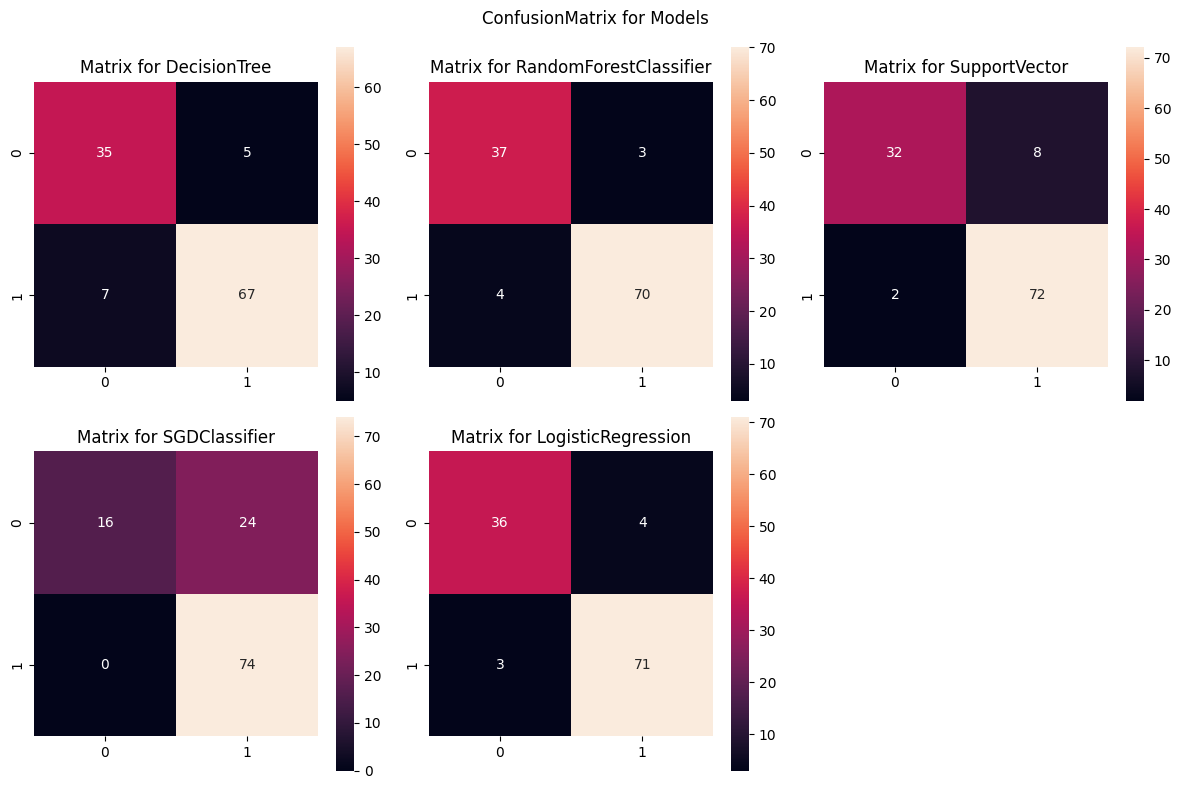

In [97]:
# 각 model별 숫자별 오류 count를 확인해 보기 위해 오차행렬 시각화
fig = plt.figure(figsize = (12,8))
for i, model in enumerate(models.keys()) :
    ax = fig.add_subplot(2,3,i+1)
    sns.heatmap(data = models[model]['conf'], annot=True, square= True)
    plt.title('Matrix for {}'.format(model))
    
plt.suptitle('ConfusionMatrix for Models')
plt.tight_layout()
plt.show()

# III. 결론

Decision Tree, Random Foreset, Support Vector, SGD, Logistic Regression 5가지 모델로 유방암에 대한 분류 작업을 수행했습니다.  
Accuracy, F1_Score, Precision, Recall, Confusion Matrix의 성능 지표를 종합적으로 판단했을 때 모든 측면에서 Random Forest와 Logistic Regression이 상대적으로 높게 나왔습니다. Overfitting 문제가 발생 여지가 없다면 본 분류 작업에는 Random Forest 또는 Logistic Regresstion을 적용하여 분류하는 것이 타당해 보입니다.


## * 회고
앞의 와인 분류에서는 Random Forest가 Logistic Regression 보다 좀 더 높게 나왔었는데 유방암 분류에서는 유사하게 나왔습니다. feature 수와 target 수에 영향에 따라 차이가 있는 것이 아닌지 조심스레 추측해 봅니다. 
